# Dataset visualization

### Nececary imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from ipynb.fs.full.Utils import load_dataset, scale_data

### Reading the data

In [3]:
df = load_dataset()

### Attributes

In [4]:
df.keys()

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'category', 'A', 'A#', 'B', 'C', 'C#',
       'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
      dtype='object')

In [5]:
df.shape

(20653, 25)

### Overview

In [6]:
df.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
0,0.375,0.574,-5.305,1,0.0315,0.14300,0.000000,0.110,0.406,132.025,...,0,0,0,0,0,0,0,0,1,0
1,0.687,0.750,-4.537,1,0.0965,0.10700,0.000003,0.161,0.911,98.987,...,1,0,0,0,0,0,0,0,0,0
2,0.624,0.822,-4.434,1,0.0340,0.07410,0.000000,0.332,0.370,120.059,...,0,0,0,0,0,0,0,0,1,0
3,0.549,0.869,-4.905,0,0.0289,0.00261,0.000002,0.290,0.433,91.988,...,0,0,0,0,0,1,0,0,0,0
4,0.630,0.692,-6.709,1,0.0606,0.06730,0.000000,0.200,0.593,119.972,...,1,0,0,0,0,0,0,0,0,0


### Attribute value distributions

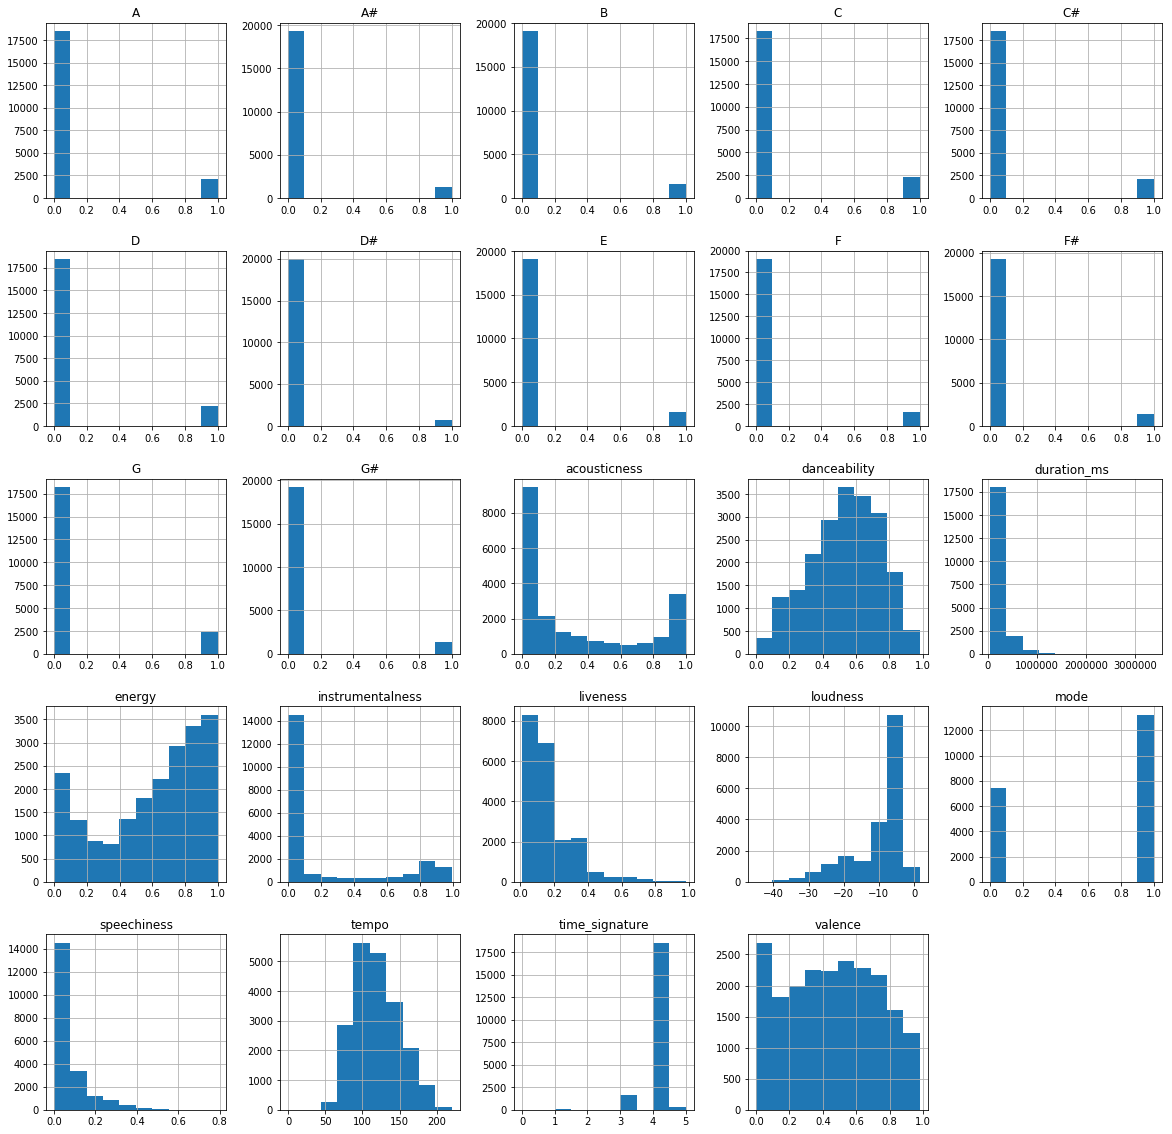

In [7]:
pd.DataFrame.hist(df, figsize=[20,20]);

In [8]:
maxv = df.max(axis=0)
maxv = maxv.drop(labels=['category', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', \
                         'mode', 'time_signature', 'G', 'G#'])
minv = df.min(axis=0)
minv = minv.drop(labels=['category', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', \
                         'mode', 'time_signature', 'G', 'G#'])

s = ''
for k in maxv.keys():
    s += "%25s | min: %15.5f | max: %15.5f\n" % (k, float(minv[k]), float(maxv[k]))
print(s)

             danceability | min:         0.00000 | max:         0.98100
                   energy | min:         0.00021 | max:         0.99900
                 loudness | min:       -44.92000 | max:         1.58500
              speechiness | min:         0.00000 | max:         0.79100
             acousticness | min:         0.00000 | max:         0.99600
         instrumentalness | min:         0.00000 | max:         0.99300
                 liveness | min:         0.01090 | max:         0.97900
                  valence | min:         0.00000 | max:         0.97900
                    tempo | min:         0.00000 | max:       220.01800
              duration_ms | min:     41667.00000 | max:   3383971.00000



### Null values

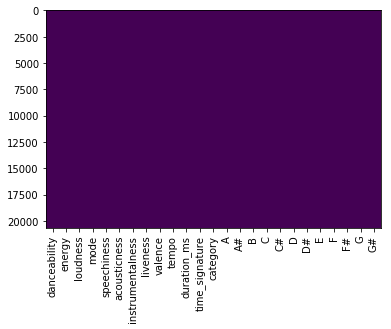

In [9]:
number_of_columns = df.shape[1]
plt.xticks(range(0, number_of_columns), df.columns, rotation='vertical')
plt.imshow(df.isnull(), cmap='viridis', aspect='auto')

### Data relations

#### Energy vs. Loudness

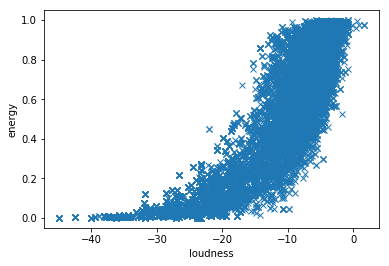

In [10]:
plt.xlabel('loudness')
plt.ylabel('energy')
plt.plot(df['loudness'], df['energy'], 'x')

#### Loudness vs. tempo

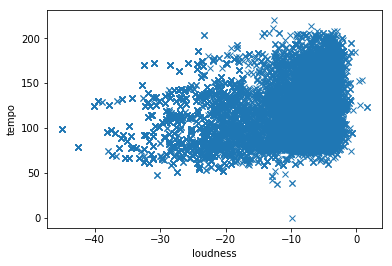

In [11]:
plt.xlabel('loudness')
plt.ylabel('tempo')
plt.plot(df['loudness'], df['tempo'], 'x')

#### Polularity vs. valence

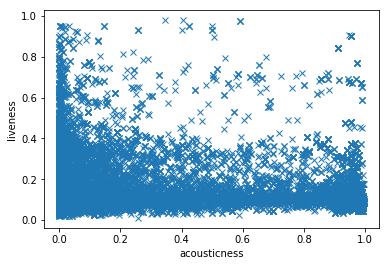

In [12]:
plt.xlabel('acousticness')
plt.ylabel('liveness')
plt.plot(df['acousticness'], df['liveness'], 'x')

#### Danceability vs. valence

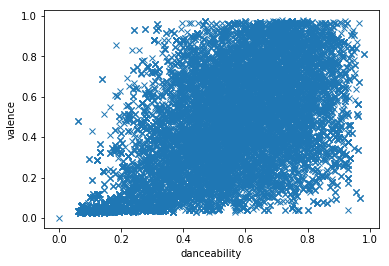

In [13]:
plt.xlabel('danceability')
plt.ylabel('valence')
plt.plot(df['danceability'], df['valence'], 'x')

### 